In [1]:
path = '/content/drive/My Drive/Colab Notebooks/UC Merced Classification/UCMerced_LandUse/Images/'

In [2]:
classes = {'agricultural':0, 'airplane':1, 'baseballdiamond':2, 'beach':3, 'buildings':4, 'chaparral':5, 'denseresidential':6,
           'forest':7, 'freeway':8, 'golfcourse':9, 'harbor':10, 'intersection':11, 'mediumresidential':12, 'mobilehomepark':13,
           'overpass':14, 'parkinglot':15, 'river':16, 'runway':17, 'sparseresidential':18, 'storagetanks':19, 'tenniscourt':20}

In [3]:
import os
import cv2 as cv
import numpy as np

In [4]:
images = []
labels = []

def load_data(path):
  for folders in os.listdir(path):
    for files in os.listdir(path + folders + '/'):
      image = cv.imread(path + folders + '/' + files)
      if image is None:
        continue
      image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
      image = cv.resize(image, (224, 224))
      image = image.astype('float32')/255.0
      label = classes[folders]
      images.append(image)
      labels.append(label)
  images_r = np.array(images)
  labels_r = np.array(labels)
  return images_r, labels_r

In [5]:
images, labels = load_data(path)

In [6]:
images.shape, labels.shape

((2100, 224, 224, 3), (2100,))

5


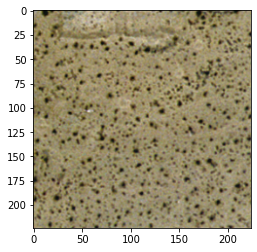

In [7]:
import matplotlib.pyplot as plt

print(labels[0])
plt.imshow(images[0])

0


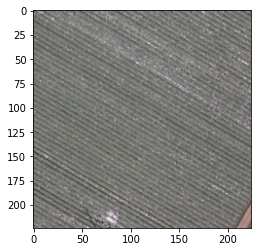

In [8]:
print(labels[101])
plt.imshow(images[101])

1


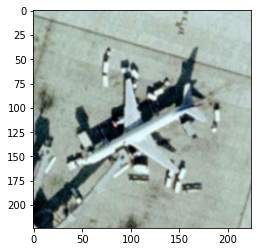

In [9]:
print(labels[202])
plt.imshow(images[202])

12


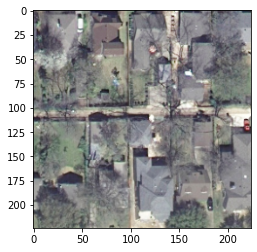

In [10]:
print(labels[1000])
plt.imshow(images[1000])

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.1, random_state=10)

In [13]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(1890, 224, 224, 3) (210, 224, 224, 3) (1890, 21) (210, 21)


In [14]:
del images
del labels

In [45]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

In [46]:
model = VGG16(include_top=False, weights='imagenet', input_tensor=(Input((224, 224, 3))))

In [47]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [48]:
basemodel = model.output
headmodel = Flatten()(basemodel)
headmodel = Dense(256, kernel_initializer='he_normal', activation='relu')(headmodel)
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(21, activation='softmax')(headmodel)

model_new = Model(inputs=model.input, outputs=headmodel)
model_new.summary()

Model: "functional_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [49]:
for layers in model.layers:
  layers.trainable = False

In [53]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)

model_new.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [54]:
history = model_new.fit(X_train, Y_train_req, epochs=50, validation_split=0.1, batch_size=32)

Epoch 1/50
54/54 [==============================] - 10s 182ms/step - loss: 2.1695 - accuracy: 0.3762 - val_loss: 1.2719 - val_accuracy: 0.6772
Epoch 2/50
54/54 [==============================] - 8s 148ms/step - loss: 1.0750 - accuracy: 0.6861 - val_loss: 0.8225 - val_accuracy: 0.8201
Epoch 3/50
54/54 [==============================] - 8s 152ms/step - loss: 0.7085 - accuracy: 0.8007 - val_loss: 0.6185 - val_accuracy: 0.8783
Epoch 4/50
54/54 [==============================] - 8s 153ms/step - loss: 0.5246 - accuracy: 0.8566 - val_loss: 0.5222 - val_accuracy: 0.8836
Epoch 5/50
54/54 [==============================] - 8s 150ms/step - loss: 0.3981 - accuracy: 0.9048 - val_loss: 0.4599 - val_accuracy: 0.8942
Epoch 6/50
54/54 [==============================] - 8s 148ms/step - loss: 0.3194 - accuracy: 0.9318 - val_loss: 0.4275 - val_accuracy: 0.8889
Epoch 7/50
54/54 [==============================] - 8s 145ms/step - loss: 0.2732 - accuracy: 0.9383 - val_loss: 0.3859 - val_accuracy: 0.9153
Epoch

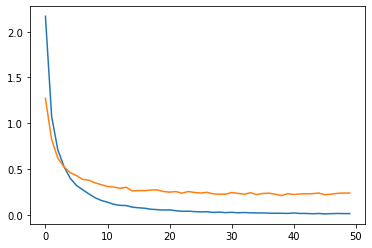

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

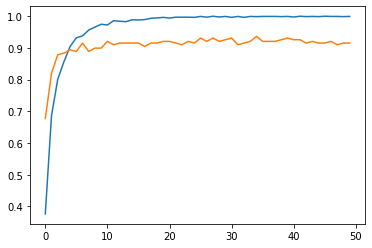

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [58]:
model_new.evaluate(X_test, Y_test_req)

7/7 [==============================] - 2s 246ms/step - loss: 0.3325 - accuracy: 0.9048


[0.33247530460357666, 0.9047619104385376]

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________